<a href="https://colab.research.google.com/github/AnaghBDeshpande/-6thSem-ML-Lab-/blob/main/1BM22CS037_Lab_9_adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score: 0.60
Confusion Matrix:
[[2 0]
 [2 1]]


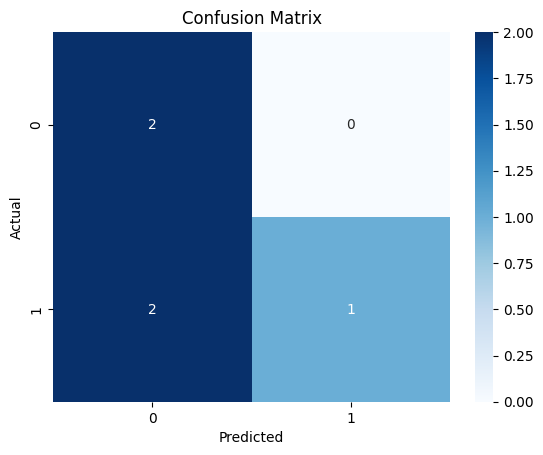

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
income_df = pd.read_csv('income.csv')

# Preprocess: Convert income to binary classes (above/below median)
median_income = income_df['Income($)'].median()
income_df['Income_Class'] = np.where(income_df['Income($)'] >= median_income, 1, 0)

# Features and target
X = income_df[['Age']]  # Using Age as feature
y = income_df['Income_Class']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train AdaBoost model
estimator = DecisionTreeClassifier(max_depth=1)
ada_model = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on test data
y_pred = ada_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
iris_df = pd.read_csv('iris.csv')

# Encode the target variable (species)
le = LabelEncoder()
iris_df['species'] = le.fit_transform(iris_df['species'])

# Features and target
X = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_df['species']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate AdaBoost
def evaluate_adaboost(estimator, n_estimators, learning_rate, estimator_name):
    model = AdaBoostClassifier(
        estimator=estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{estimator_name} with n_estimators={n_estimators}, learning_rate={learning_rate}: Accuracy = {accuracy:.3f}")
    return accuracy

# Experiment 1: Vary n_estimators and learning_rate with Decision Tree
print("AdaBoost with Decision Tree:")
dt_base = DecisionTreeClassifier(max_depth=1)
n_estimators_list = [10, 50, 100]
learning_rates = [0.1, 0.5, 1.0]

for n in n_estimators_list:
    for lr in learning_rates:
        evaluate_adaboost(dt_base, n, lr, "Decision Tree")

# Experiment 2: Use Logistic Regression as base classifier
print("\nAdaBoost with Logistic Regression:")
logreg_base = LogisticRegression(max_iter=1000)
for n in n_estimators_list:
    for lr in learning_rates:
        evaluate_adaboost(logreg_base, n, lr, "Logistic Regression")

AdaBoost with Decision Tree:
Decision Tree with n_estimators=10, learning_rate=0.1: Accuracy = 0.967
Decision Tree with n_estimators=10, learning_rate=0.5: Accuracy = 1.000
Decision Tree with n_estimators=10, learning_rate=1.0: Accuracy = 1.000
Decision Tree with n_estimators=50, learning_rate=0.1: Accuracy = 1.000
Decision Tree with n_estimators=50, learning_rate=0.5: Accuracy = 0.967
Decision Tree with n_estimators=50, learning_rate=1.0: Accuracy = 0.933
Decision Tree with n_estimators=100, learning_rate=0.1: Accuracy = 1.000
Decision Tree with n_estimators=100, learning_rate=0.5: Accuracy = 1.000
Decision Tree with n_estimators=100, learning_rate=1.0: Accuracy = 0.933

AdaBoost with Logistic Regression:
Logistic Regression with n_estimators=10, learning_rate=0.1: Accuracy = 1.000
Logistic Regression with n_estimators=10, learning_rate=0.5: Accuracy = 0.967
Logistic Regression with n_estimators=10, learning_rate=1.0: Accuracy = 0.933
Logistic Regression with n_estimators=50, learning